In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [3]:
class_counts = df['class'].value_counts()

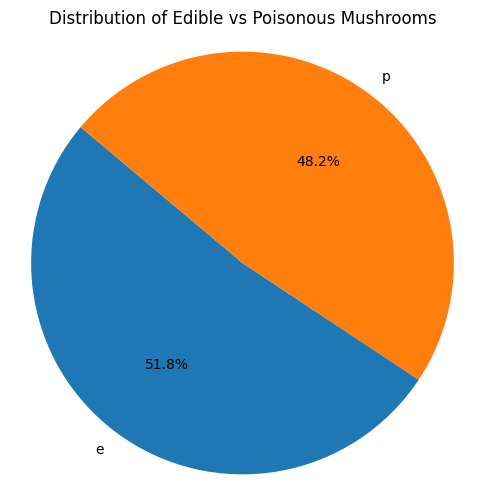

In [9]:
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        startangle=140)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.axis('equal')
plt.show()

The pie chart shows a roughly balanced distribution between edible (51.8%) and poisonous (48.2%) mushrooms.

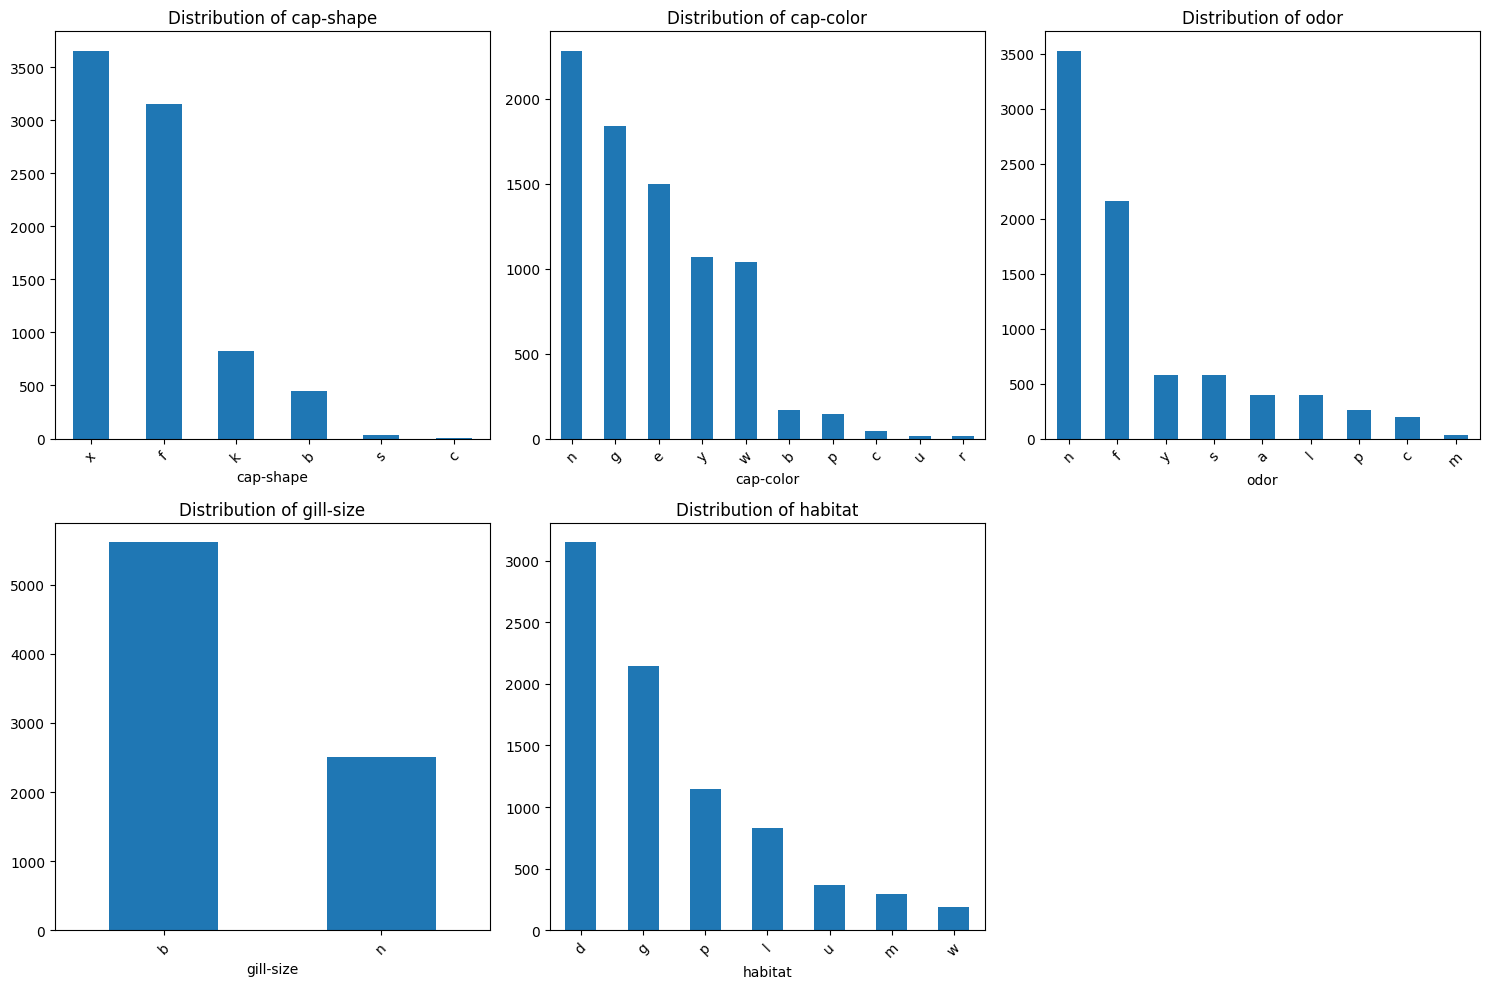

In [4]:
features_to_visualize = ['cap-shape', 'cap-color', 'odor', 'gill-size', 'habitat']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The bar chart shows us how mushroom caps are formed: Most common shape is Convex, Second most common is Flat 

* Nature's color palette for mushroom caps reveals: Most frequent is Brown, Also common is Gray and red caps

* The smell chart shows some fascinating patterns: Most mushrooms (about 40%) have no smell at all

* Broad gills are slightly more common than narrow ones. The balance between the two is nearly even, suggesting both types are well-represented in nature
Since gill size relates to edibility, this near-balance helps our models distinguish between types effectively.

* Woods are by far the most common home for these mushrooms. Grassy areas and leaves are secondary common habitats

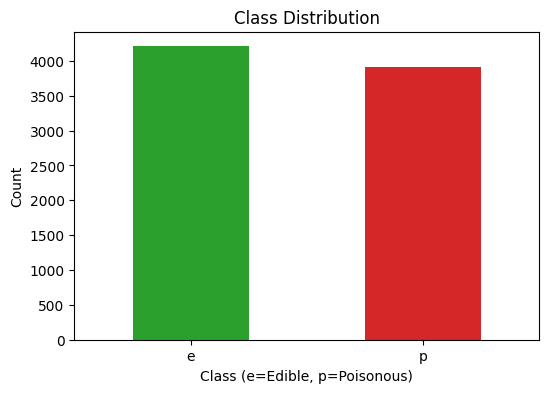

In [10]:
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['#2ca02c', '#d62728'])
plt.title('Class Distribution')
plt.xlabel('Class (e=Edible, p=Poisonous)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
value_counts_summary = {col: df[col].value_counts() for col in df.columns[:6]}

for feature, counts in value_counts_summary.items():
    print(f"\n--- {feature} ---")
    print(counts)


--- class ---
class
e    4208
p    3916
Name: count, dtype: int64

--- cap-shape ---
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

--- cap-surface ---
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

--- cap-color ---
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

--- bruises ---
bruises
f    4748
t    3376
Name: count, dtype: int64

--- odor ---
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


In [19]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
df_encoded = df.apply(LabelEncoder().fit_transform)

In [21]:
corr_matrix = df_encoded.corr()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


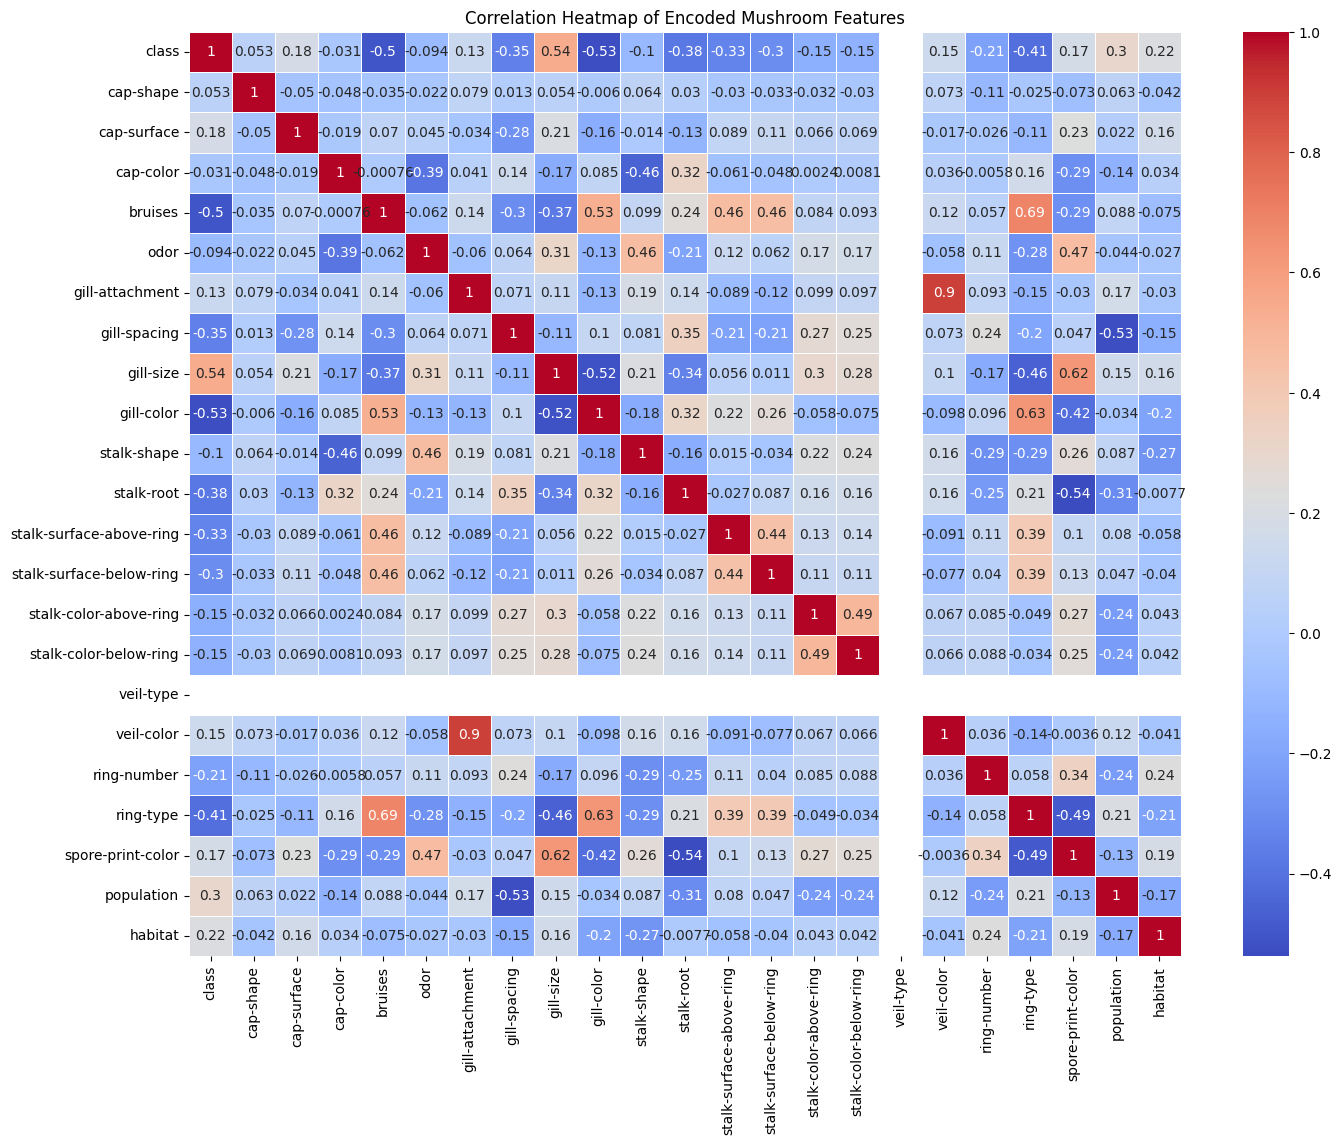

In [23]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded Mushroom Features')
plt.show()

In [24]:
correlation_with_class = corr_matrix['class'].sort_values(ascending=False)
correlation_with_class

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [43]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [44]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [45]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [46]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)


accuracy_dt, confusion_dt

(1.0,
 array([[843,   0],
        [  0, 782]]))

In [47]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

confusion_rf = confusion_matrix(y_test, y_pred_rf)

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

accuracy_rf, confusion_rf

(1.0,
 array([[843,   0],
        [  0, 782]]))

In [48]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd


In [49]:
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}


In [50]:
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Best Parameters (Decision Tree):", grid_dt.best_params_)
print("Best Score:", grid_dt.best_score_)

Best Parameters (Decision Tree): {'max_depth': 15, 'min_samples_split': 2}
Best Score: 1.0


In [51]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}

In [52]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0


In [53]:
importances = grid_rf.best_estimator_.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

In [55]:
feature_df

,Feature,Importance
4,odor,0.188972
7,gill-size,0.109158
19,spore-print-color,0.102559
18,ring-type,0.089153
8,gill-color,0.075505
10,stalk-root,0.066686
20,population,0.058882
3,bruises,0.052097
11,stalk-surface-above-ring,0.041891
6,gill-spacing,0.041044


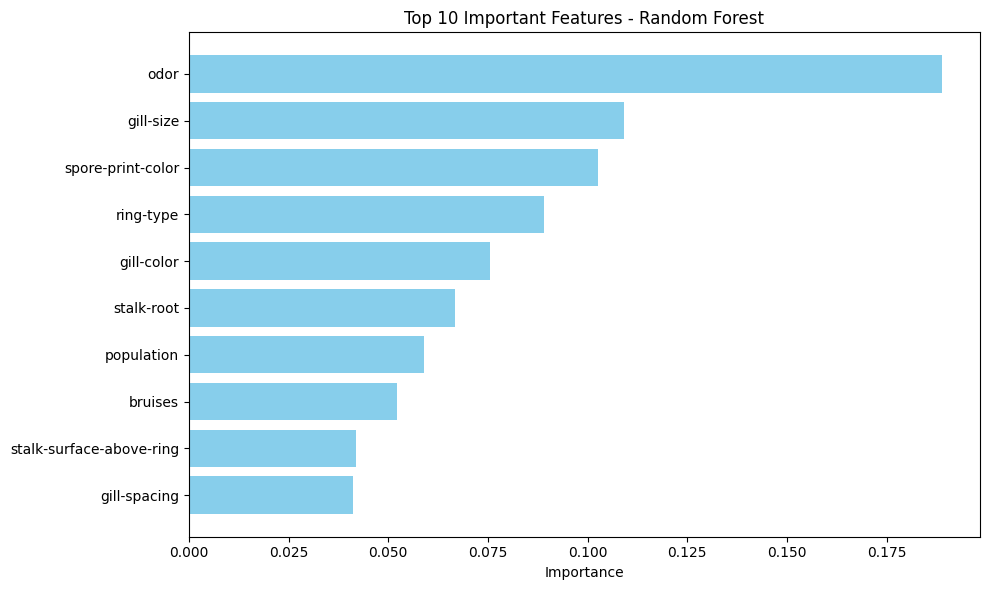

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 10 Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()